In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer


# metrics.confusion_matrix()

# Diabetes Data

## Setup

In [2]:
dataset = pd.read_csv('diabetes.csv')
print(dataset.shape)
dataset.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
x = dataset.copy()
x.pop('Outcome')
x.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [4]:
y = dataset.loc[:,'Outcome']
y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [5]:
x = x.values
y = y.values

In [6]:
x.shape

(768, 8)

In [7]:
y.shape

(768,)

## Problem 1

### Part 1

In [8]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state=1)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
x_train.shape

(614, 8)

In [11]:
x_test.shape

(154, 8)

In [12]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [13]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[89, 10],
       [24, 31]])

In [25]:
print(f"Accuracy: {100 * metrics.accuracy_score(y_test, y_pred)}%");
print(f"Precision: {100 * metrics.precision_score(y_test, y_pred)}%");
print(f"Recall: {100 * metrics.recall_score(y_test, y_pred)}%");

Accuracy: 77.92207792207793%
Precision: 75.60975609756098%
Recall: 56.36363636363636%


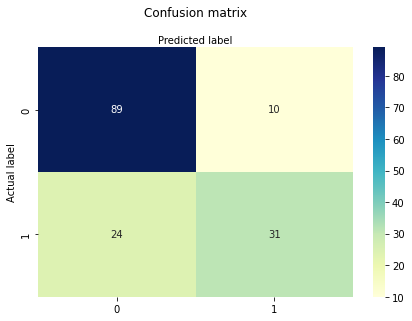

In [16]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [17]:
# import warnings
# warnings.filterwarnings('ignore')
X_set, Y_set = x_test.copy(), y_test.copy()
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max()),
                     np.arange(start = (X_set[:, 1].min() - 1), stop = (X_set[:, 1].max()))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X_set),
        alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
        c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

SyntaxError: invalid syntax (2720530001.py, line 6)

## Problem 2

### Part 1

In [18]:
# Scale data
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x.copy())

In [24]:
kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle = True)
model = LogisticRegression(solver='liblinear')
results = model_selection.cross_val_score(model, x, y, cv = kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 76.425% (3.278%)


### Part 2

# Cancer Data

## Setup

In [ ]:
breast = load_breast_cancer()

In [ ]:
breast_data = breast.data
breast_data.shape

In [ ]:
breast_labels = breast.target
breast_labels = np.reshape(breast_labels,(len(breast_labels),1))
breast_labels.shape

In [ ]:
final_breast_data = np.concatenate([breast_data,breast_labels],axis=1)
final_breast_data.shape

In [ ]:
breast_df = pd.DataFrame(final_breast_data)
breast_df.columns = np.append(breast.feature_names,'label')
breast_df.head(20) # print 20 to see two labels

In [ ]:
# # Removed  for numeric data
# breast_df['label'].replace(0, 'Benign',inplace=True)
# breast_df['label'].replace(1, 'Malignant',inplace=True)
# breast_df.tail(6) # Showing tail 6 to test remap

## Problem 3

### Part 1

### Part 2

## Problem 4

### Part 1

### Part 2